In [193]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes=True
sns.set() #overwrites all graphs to the seaborn style

    data from https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. 

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

### Exploratory Data Analysis (EDA)

    Analysis and preprocessing

Loading the data

In [194]:
df=pd.read_csv('db/housing.csv', 
               header=None,
               delim_whitespace=True)#by default pandas expects commas as delimiters, this sets delimiter as whitespaces
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700


Adding column names

In [195]:
columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns=columns
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0,0.573,6.593,69.100,2.479,1,273.000,21.000,391.990,9.670,22.400
502,0.045,0.000,11.930,0,0.573,6.120,76.700,2.288,1,273.000,21.000,396.900,9.080,20.600
503,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273.000,21.000,396.900,5.640,23.900
504,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273.000,21.000,393.450,6.480,22.000


In [196]:
df.isnull().values.any()

False

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [198]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


    Visualization

In [199]:
sns.pairplot(df)

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

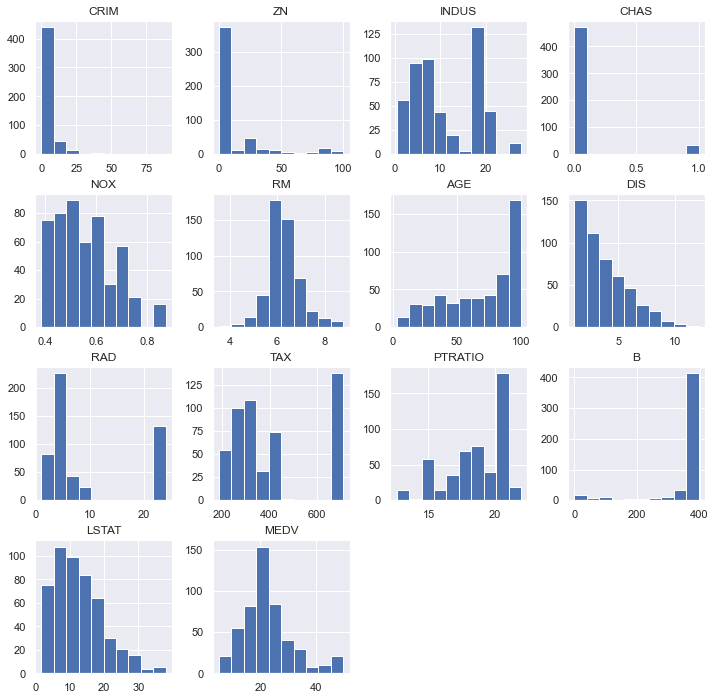

In [ ]:
df.hist(figsize=(12,12))

In [ ]:
backup1=df.copy()

### Correlation Analysis and Feature Selection

We are looking for values that are strongly positive or strongly negative

Usefull for when you have a lot of features

In [ ]:
pd.options.display.float_format='{:,.3f}'.format #changing to 3 decimal points
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


    Plotting the correlation on a heatmap

Better visulization

<AxesSubplot: >

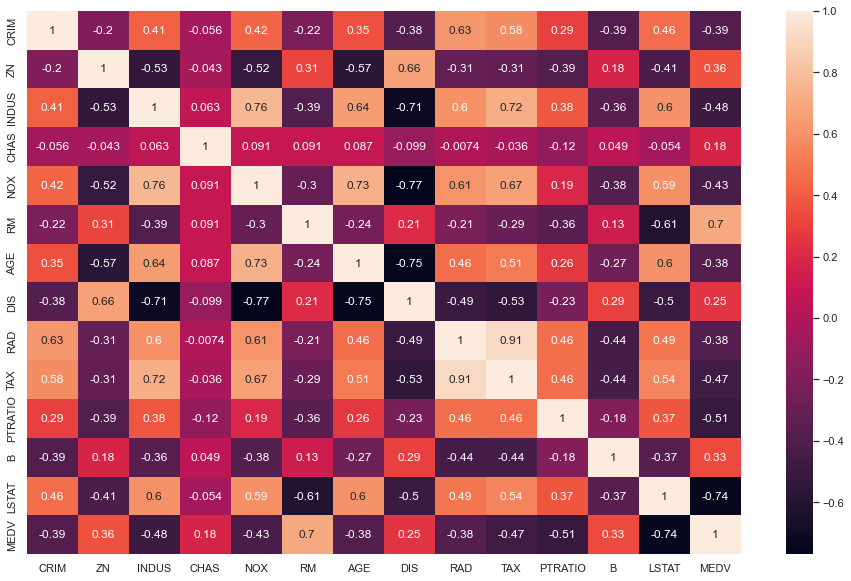

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

    Dropping variables with low correlation

In [ ]:
df.drop(columns=['CRIM','CHAS','RAD','B','PTRATIO'],inplace=True)

## Regression

In [ ]:
df.columns

Index(['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT', 'MEDV'], dtype='object')

In [ ]:
x=df[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y=df['MEDV']

    Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

    Train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

    Linear Regression

In [ ]:
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 1.37941251, -0.03800856, -0.72857512,  3.49147481, -0.36458698,
       -3.25223425, -1.72060893, -4.24046935])

In [ ]:
model.intercept_

22.500092187918533

    Train Prediction

In [ ]:
y_hat = model.predict(x_train)
model.score(x_train,y_train)

0.6965396572203311

    model score: 0.6965

Plotting predictions against actual value

<AxesSubplot: xlabel='MEDV'>

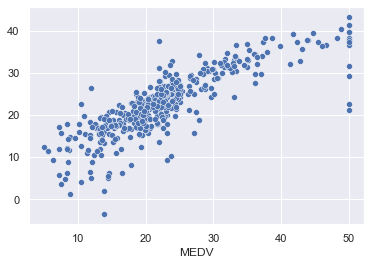

In [ ]:
sns.scatterplot(data=model, x=y_train,y=y_hat)

showing the difference between the 'correct' and the predicted one

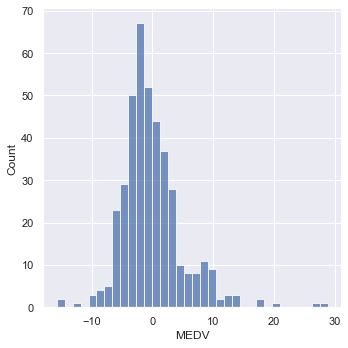

In [ ]:
sns.displot(y_train-y_hat)

    Test prediction

In [ ]:
y_hat_test = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.6289816059906994

    Model Test Score: 0.6289

<AxesSubplot: xlabel='MEDV'>

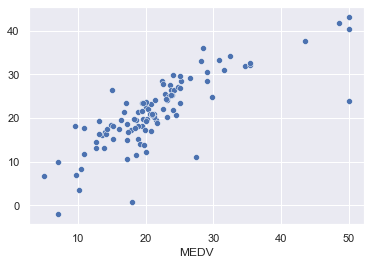

In [ ]:
sns.scatterplot(x=y_test,y=y_hat_test)

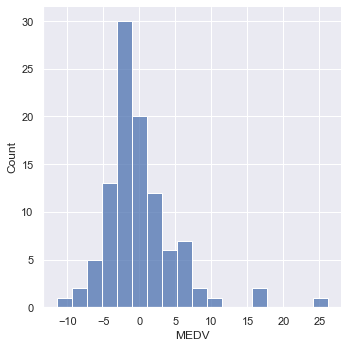

In [ ]:
sns.displot(y_test-y_hat_test)

### Model 2

In [ ]:
x1=df['RM']
y1=df['MEDV']

    Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(x1)
x1=scaler.transform(x1)

    Train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1, test_size=0.2, random_state=42)

    Linear Regression

In [ ]:
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([6.56178323])

In [ ]:
model.intercept_

22.504337584466665

    Train Prediction

In [ ]:
y_hat = model.predict(x_train)
model.score(x_train,y_train)

0.5050658352776293

    model score: 0.6501

Plotting predictions against actual value

<AxesSubplot: xlabel='MEDV'>

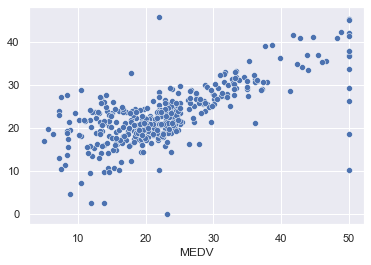

In [ ]:
sns.scatterplot(data=model, x=y_train,y=y_hat)

showing the difference between the 'correct' and the predicted one

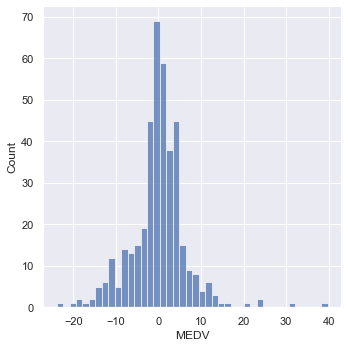

In [ ]:
sns.displot(y_train-y_hat)

    Test prediction

In [ ]:
y_hat_test = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.3707569232254778

    Model Test Score: 0.6289

<AxesSubplot: xlabel='MEDV'>

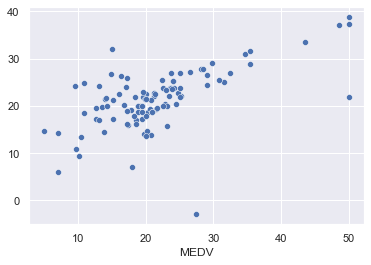

In [ ]:
sns.scatterplot(x=y_test,y=y_hat_test)

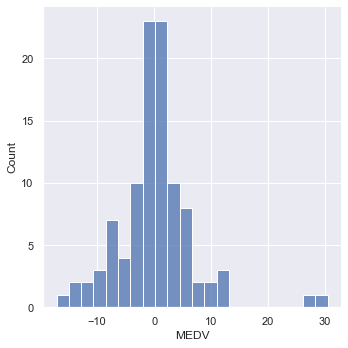

In [ ]:
sns.displot(y_test-y_hat_test)